In [19]:
print("hi")

hi


# Lab 2.1: Understanding CNN Layers with VGG16

**Objective:**  
Visualize internal feature maps of VGG16 to understand how CNNs detect features at different depths.

We analyze:
- block1_conv1 (Early Layer)
- block3_conv3 (Middle Layer)
- block5_conv3 (Deep Layer)

In [20]:
!pip install tensorflow

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

%matplotlib inline

In [22]:
base_model = VGG16(weights='imagenet', include_top=False)

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
layer_names = [
    'block1_conv1',   # Early
    'block3_conv3',   # Middle
    'block5_conv3'    # Deep
]

outputs = [base_model.get_layer(name).output for name in layer_names]

feature_extractor = Model(inputs=base_model.input, outputs=outputs)

print("Feature extractor created successfully.")

Feature extractor created successfully.


367441/367441 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


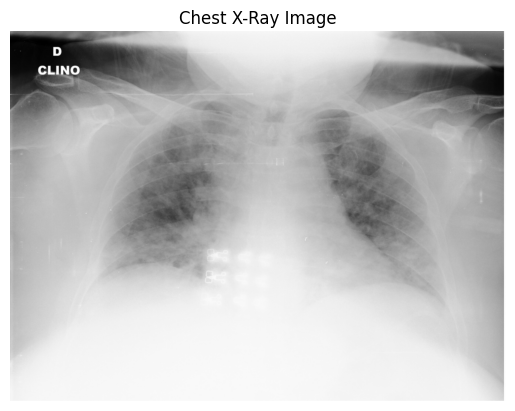

In [24]:
img_path = tf.keras.utils.get_file(
    "xray.jpg",
    "https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg"
)

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

plt.imshow(image.load_img(img_path))
plt.title("Chest X-Ray Image")
plt.axis("off")
plt.show()

In [25]:
feature_maps = feature_extractor.predict(img_array)

print("Feature maps extracted from 3 layers.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Feature maps extracted from 3 layers.


In [26]:
def plot_feature_maps(feature_map, layer_name):
    plt.figure(figsize=(10,10))

    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.suptitle(f"{layer_name} - First 16 Filters", fontsize=16)
    plt.tight_layout()
    plt.show()

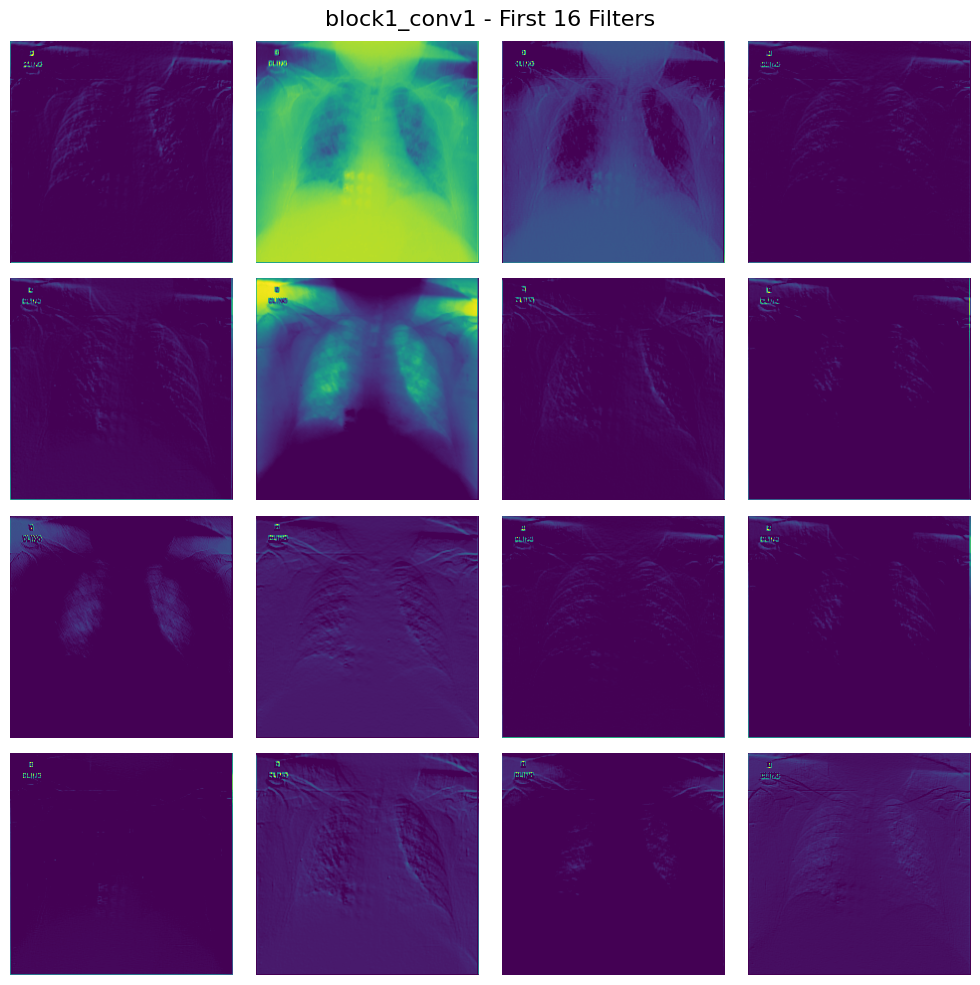

In [27]:
plot_feature_maps(feature_maps[0], "block1_conv1")

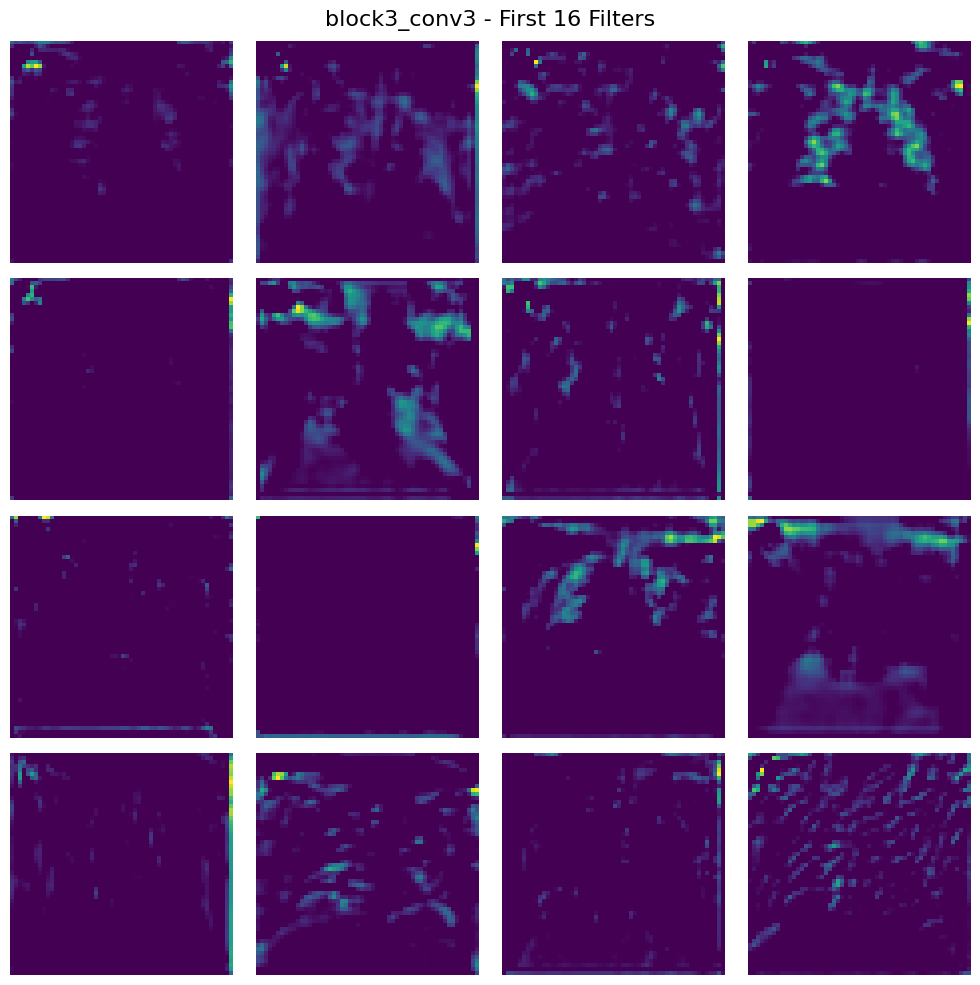

In [28]:
plot_feature_maps(feature_maps[1], "block3_conv3")

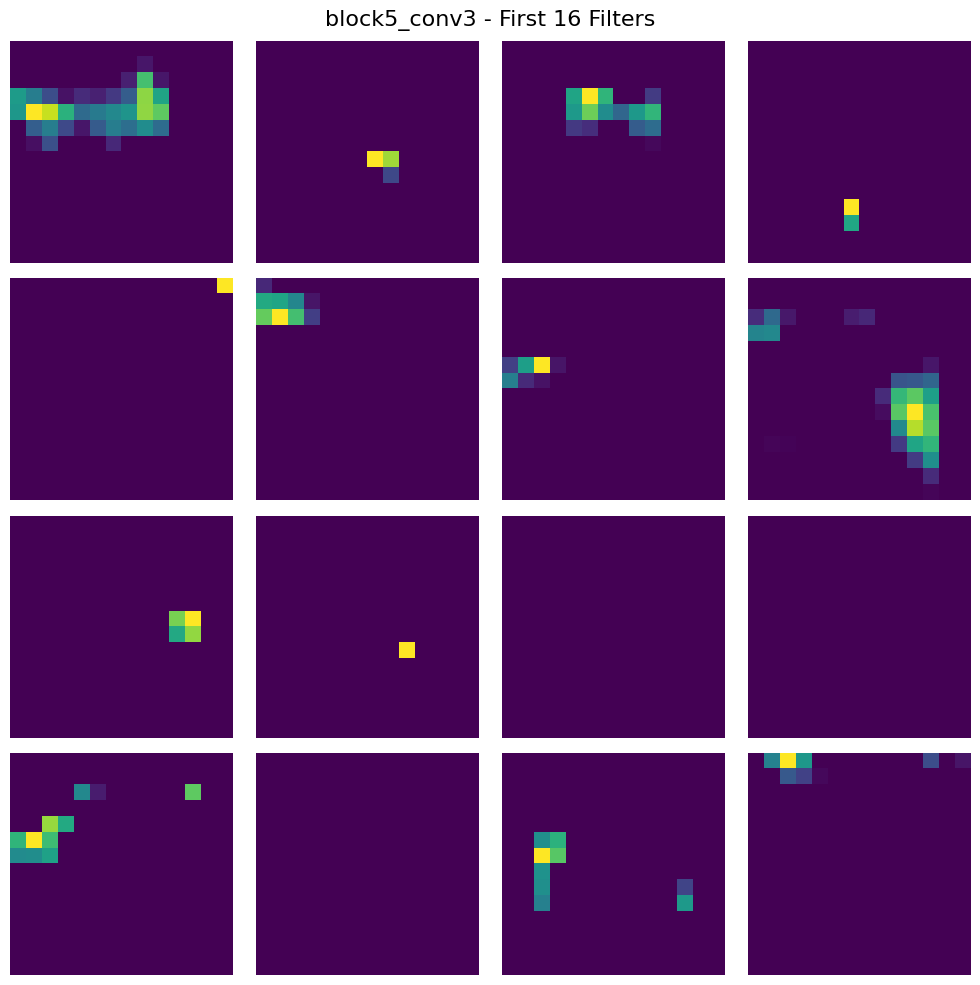

In [29]:
plot_feature_maps(feature_maps[2], "block5_conv3")

## Observations on Chest X-Ray Feature Maps

1. The early layer (block1_conv1) detects basic structural patterns such as edges and contrast boundaries. In the X-ray image, these correspond to rib edges, lung boundaries, and sharp intensity transitions.

2. The middle layer (block3_conv3) captures more complex structural groupings. These feature maps highlight clustered anatomical regions, such as rib cages and lung cavities, indicating spatial aggregation of early edge features.

3. The deep layer (block5_conv3) produces sparse and abstract activations. Since VGG16 was trained on natural images (ImageNet), the deeper filters are not specialized for medical patterns. Therefore, activations are less semantically meaningful for clinical interpretation.

This demonstrates that while early convolutional layers generalize well across domains, deeper layers become task-specific and require fine-tuning for medical applications.